# Function Transformation

### when we have important data in outlier and we can not remove outliers, in this kind of case we have to use function transformation. function transformation compress our data and transform non-normal distribution to normal distribution data

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv("data_sets/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            616 non-null    object 
 1   Gender             603 non-null    object 
 2   Married            613 non-null    object 
 3   Dependents         601 non-null    object 
 4   Education          616 non-null    object 
 5   Self_Employed      584 non-null    object 
 6   ApplicantIncome    616 non-null    int64  
 7   CoapplicantIncome  616 non-null    float64
 8   LoanAmount         594 non-null    float64
 9   Loan_Amount_Term   602 non-null    float64
 10  Credit_History     566 non-null    float64
 11  Property_Area      616 non-null    object 
 12  Loan_Status        616 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.7+ KB


In [4]:
df.shape

(616, 13)

In [5]:
numaric_cols = df.select_dtypes(exclude="object").columns # getting all numaric columns
object_cols = df.select_dtypes(include="object").columns # getting all non-numaric columns

In [6]:
for object_col in object_cols:
    df[object_col] = df[object_col].fillna(df[object_col].mode()[0])

In [7]:
for numaric_col in numaric_cols:
    df[numaric_col] = df[numaric_col].fillna(df[numaric_col].mean())

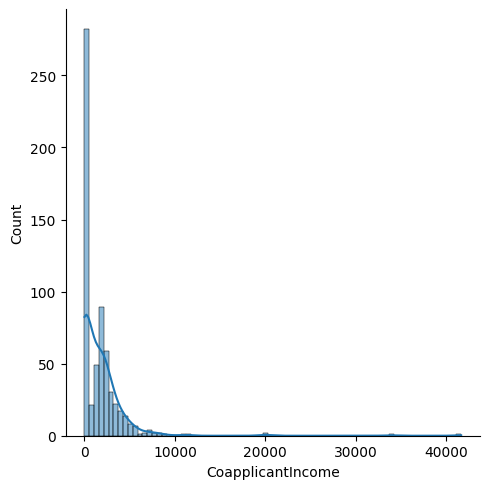

In [8]:
sns.displot(df["CoapplicantIncome"], kde=True) # visualizing the distribution of CoapplicantIncome

In [9]:
ft = FunctionTransformer(func=np.log1p, validate=False) # log1p is a function that applies log(1+x) to the data
df["CoapplicantIncome"] = ft.fit_transform(df["CoapplicantIncome"]) 

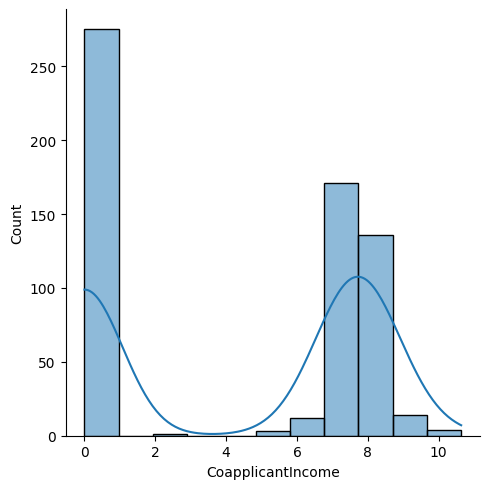

In [10]:
sns.displot(df["CoapplicantIncome"], kde=True) # visualizing the distribution of CoapplicantIncome